# IMPORT

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

os.chdir(r'F:\\UNIVERSITY\\UNIVERSITY_DOCUMENTS\\CS231\\doan_v2')

from utils.utils_fn import save_json, load_json
from utils.utils_plt import bar_plot

from tqdm import tqdm
from collections import Counter

# **LOAD DATA**

In [23]:
data_path = 'data/new_save_all.json'
data = load_json(data_path)

# **EXPLORE DATA**

*Genres*

In [24]:
# Get all genres
all_genres = [val['genre'] for val in data.values()]
all_genres = list(np.concatenate(all_genres))

# Unique Genres
unique_genres = np.unique(all_genres)

In [25]:
# Counter Genres
genres_counter = Counter(all_genres)

# **PREPROCESSING**

In [26]:
'''
    1. Merge data
    2. Filter data 
        - Remove plank, no im_url, no genres
        - Engineering label: (nature adventure, hell adventure) --> adventure
    3. Train Test Split using scikit-multilearn
'''

'\n    1. Merge data\n    2. Filter data \n        - Remove plank, no im_url, no genres\n        - Engineering label: (nature adventure, hell adventure) --> adventure\n    3. Train Test Split using scikit-multilearn\n'

## *Filter Data: **Engineering Label***

In [28]:
thresholds = [500, 1000, 1500, 2000]
# thresholds = [i for i in range(500, 2001, 100)]

# Encoding with 'others'
convert_genres_dic_list = {}
for threshold in thresholds:
    convert_genres_dic = {key: 'others' if count < threshold else key for key, count in genres_counter.items()}
    convert_genres_dic_list[threshold] = convert_genres_dic
        


In [30]:
# Bar plot
def bar_plot(b_labels, b_values, title=''):
    plt.bar(
        x=b_labels,
        height=b_values,
        width=0.5,
    )
    plt.xticks(rotation=70)
    plt.xlabel(title)

In [31]:
a = np.array([1, 2, 4, 5])
a[[2, 1, 0, 3]]

array([4, 2, 1, 5])

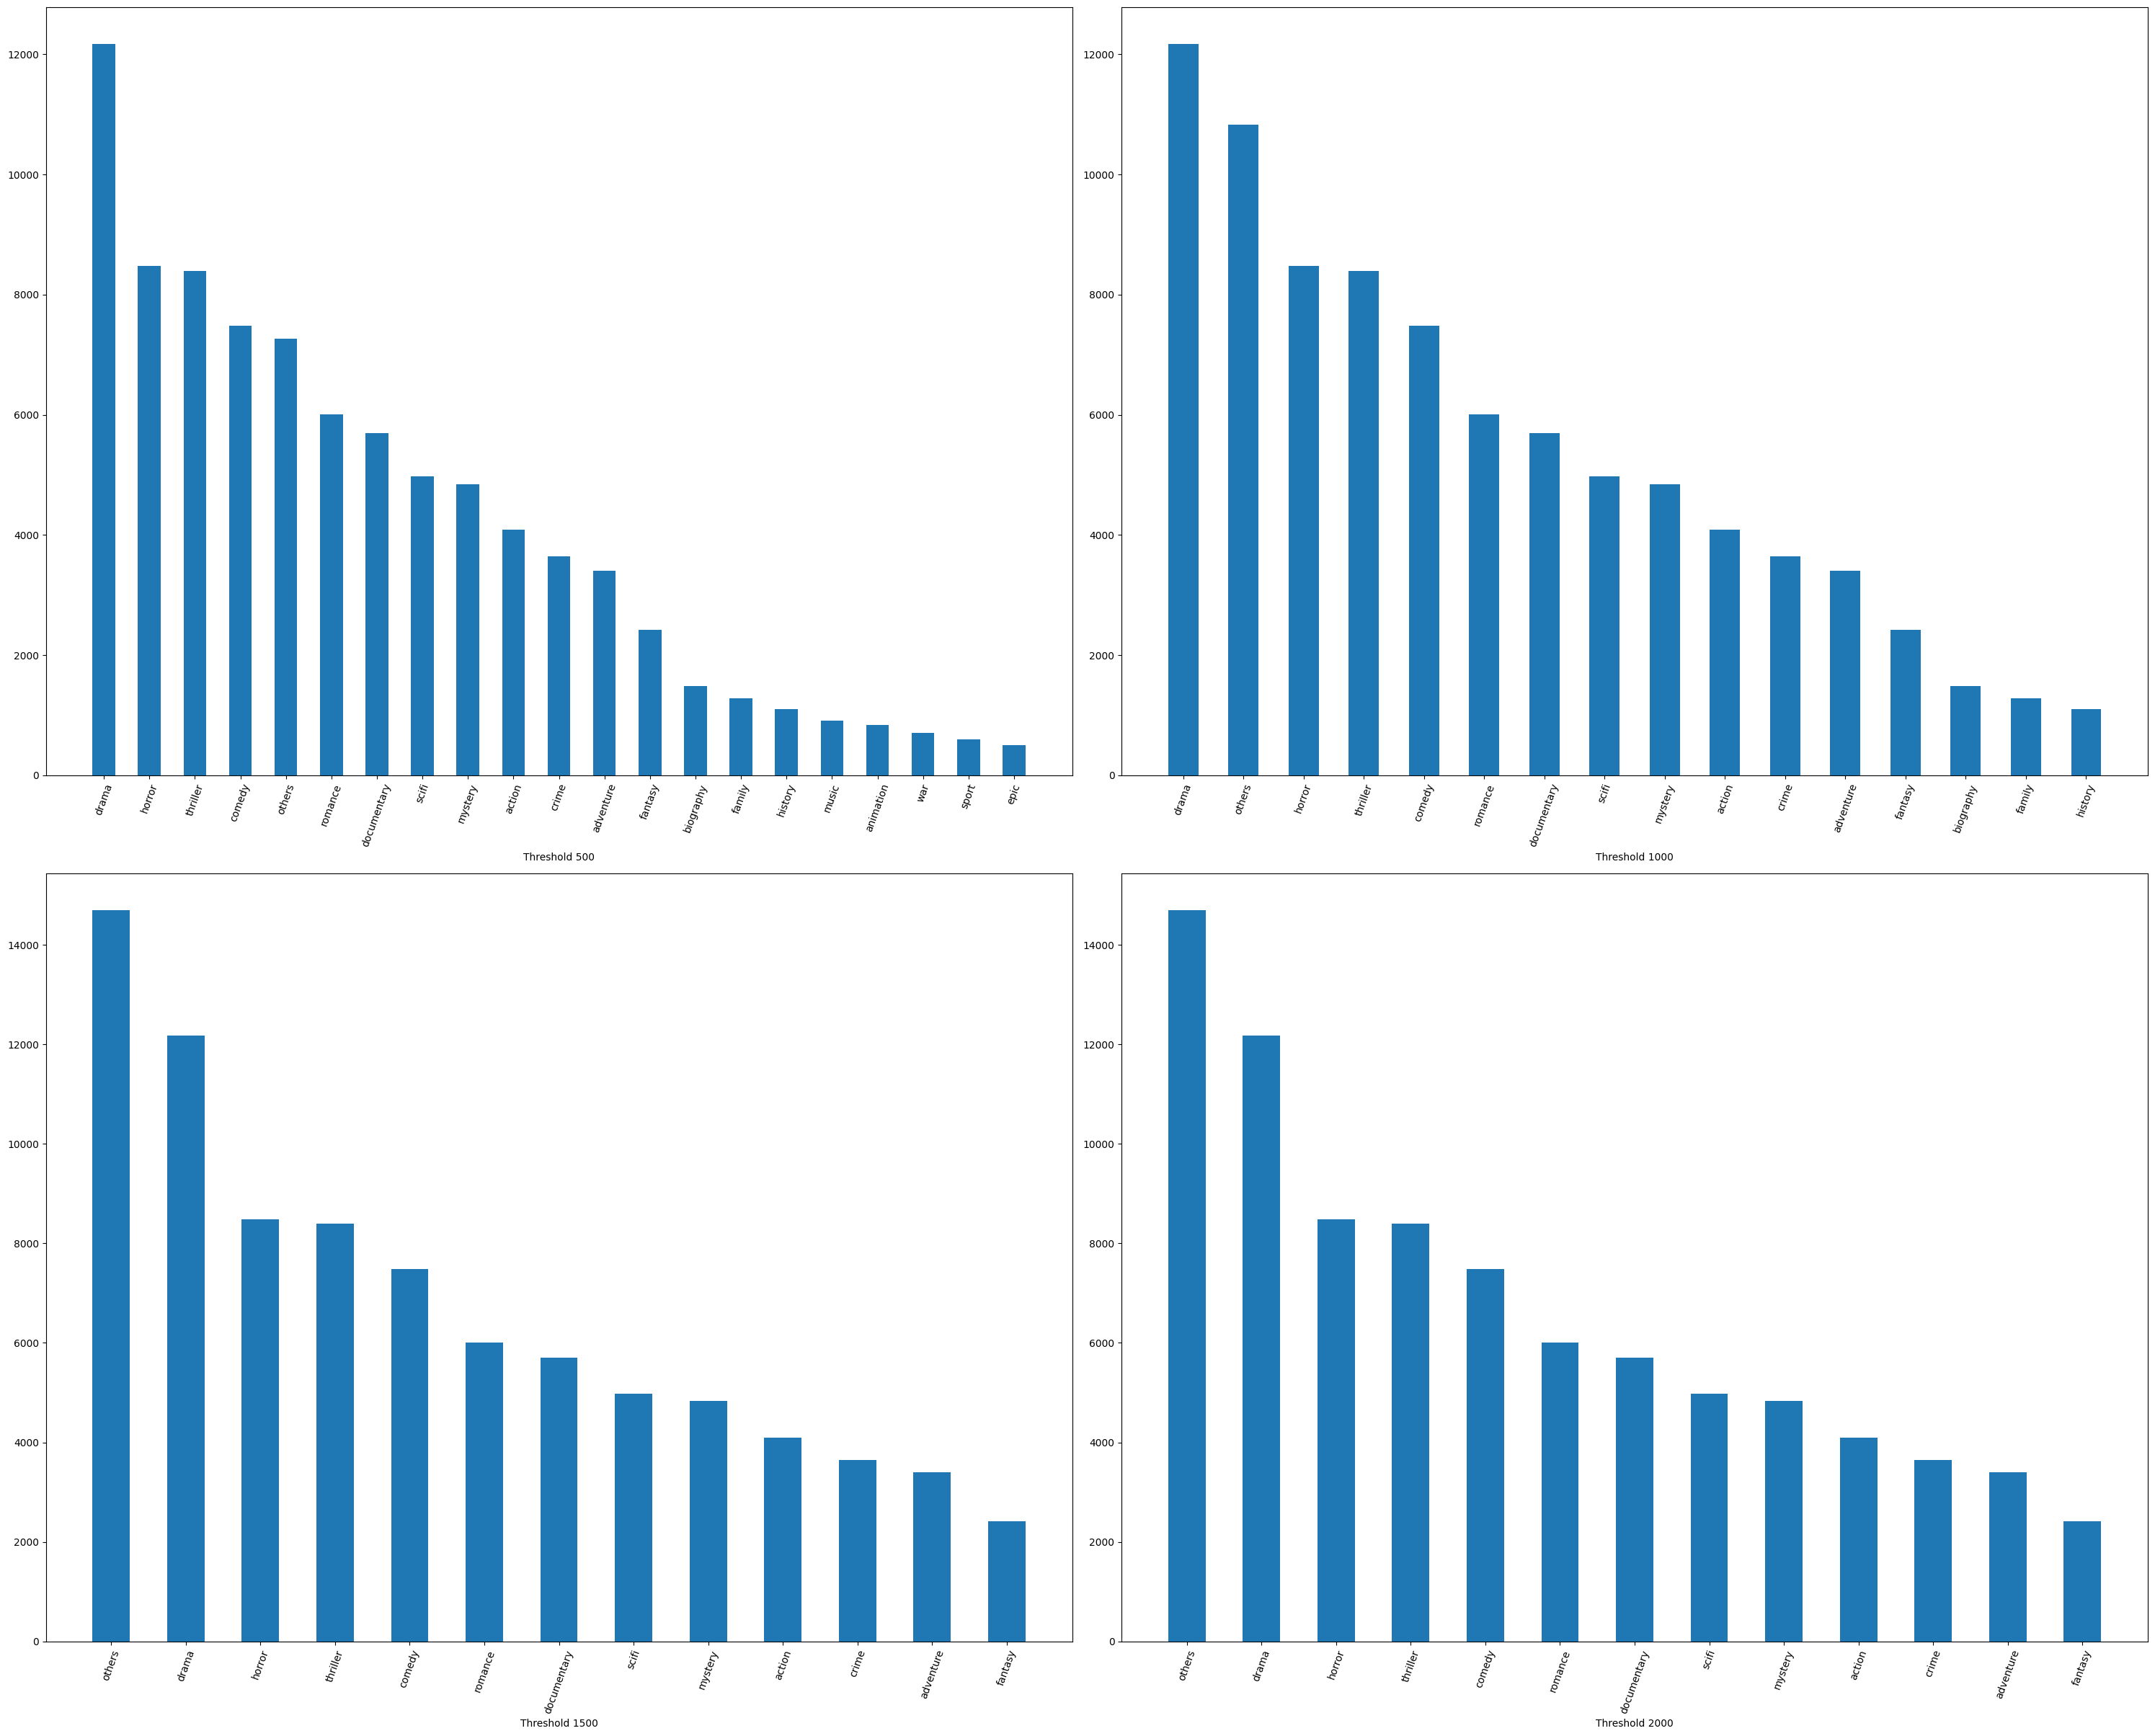

In [32]:
num_cols = 2
num_rows = len(convert_genres_dic_list) // 2 + 1
plt.figure(figsize=(30, 35))
convert_genres_list = []
for i, dic in enumerate(convert_genres_dic_list.values()):
    convert_genres = [dic[genre] for genre in all_genres]
    convert_genres_list.append(convert_genres)

    convert_counters = Counter(convert_genres)
    # print(convert_counters)
    
    keys, values = convert_counters.keys(), convert_counters.values()
    keys, values = np.array(list(keys)), np.array(list(values))
    sort_id = np.argsort(values)[::-1]
    keys, values = keys[sort_id], values[sort_id]
    # Barplot
    ax = plt.subplot(num_rows, num_cols, i + 1)
    bar_plot(
        b_labels=list(keys), 
        b_values=values,
        title=f'Threshold {thresholds[i]}',
        # ax=plt,
    )
plt.tight_layout()
plt.show()

In [9]:
# PARA
threshold = 1500
convert_genres_dic = convert_genres_dic_list[threshold]

# Engineering label
save_all_final = {}
for key, val in data.items():
    genres = val['genre']
    genres = [convert_genres_dic[genre] for genre in genres]
    genres = list(np.unique(genres))

    # Assign
    val['genre'] = genres
    save_all_final[key] = val
    

: 

: 

: 

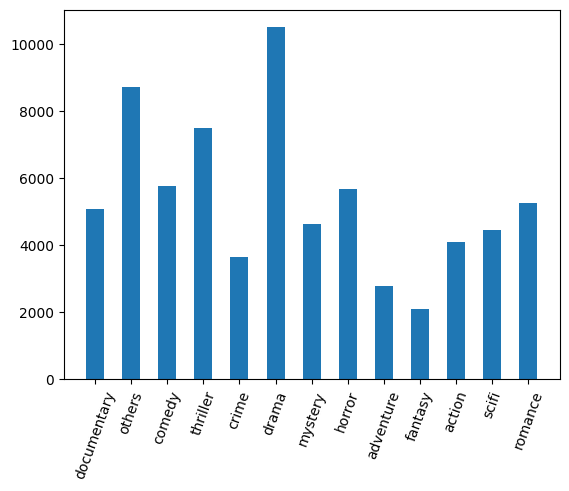

: 

: 

: 

In [ ]:
save_all_final_genres = [val['genre'] for val in save_all_final.values()]
save_all_final_genres = np.concatenate(save_all_final_genres)
count = Counter(save_all_final_genres)

bar_plot(b_labels=list(count.keys()), b_values=count.values())

## *Remove Unnecessary Feature*

In [29]:
save_all_final_clean = {}
useless_keys = ['time', 'year', 'age', 'storyline']
for key, val in save_all_final.items():
    for useless_key in useless_keys:
        val.pop(useless_key, None)
    save_all_final_clean[key] = val

# **SAVE JSON**

In [12]:
save_all_final_path = 'data/save_all_final_clean.json'
save_json(save_all_final_clean, save_all_final_path)

: 

: 